# Wine quality prediction using Random Forest Classifier

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
data=pd.read_csv(r"F:\Nikhila AIML\TefoLOGIC training\WineQT.csv")

In [95]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [96]:
data=data.drop('Id',axis=1)

In [97]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
fixed acidity           1143 non-null float64
volatile acidity        1143 non-null float64
citric acid             1143 non-null float64
residual sugar          1143 non-null float64
chlorides               1143 non-null float64
free sulfur dioxide     1143 non-null float64
total sulfur dioxide    1143 non-null float64
density                 1143 non-null float64
pH                      1143 non-null float64
sulphates               1143 non-null float64
alcohol                 1143 non-null float64
quality                 1143 non-null int64
dtypes: float64(11), int64(1)
memory usage: 107.2 KB


In [99]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [100]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002408EF150B8>,
      dtype=object)

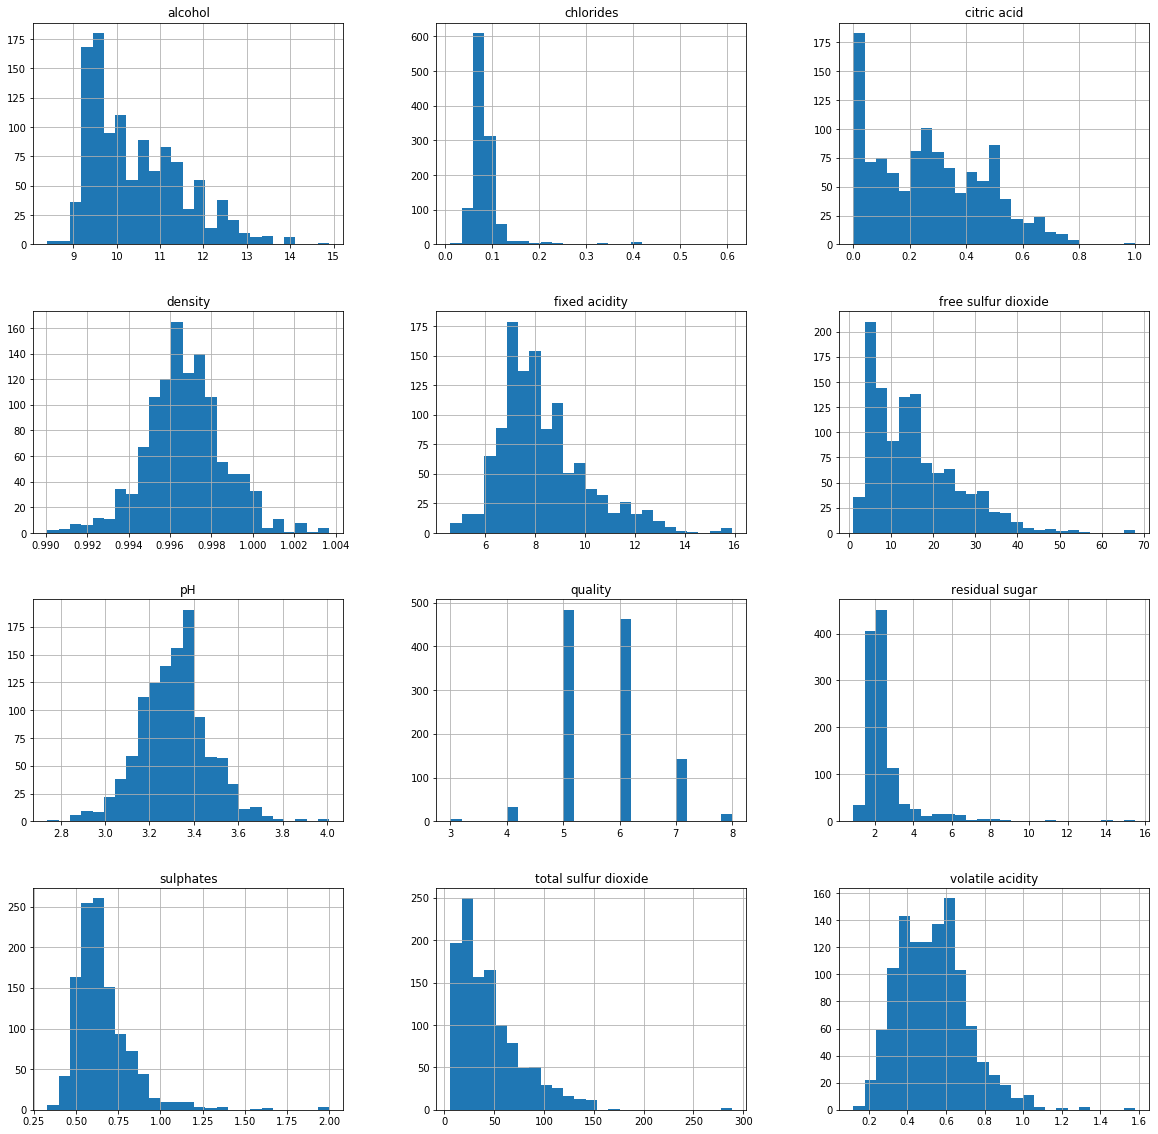

In [101]:
data.hist(figsize=(20,20),bins=25)

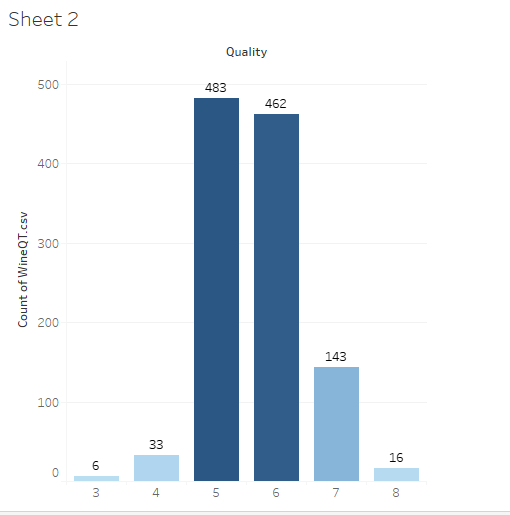

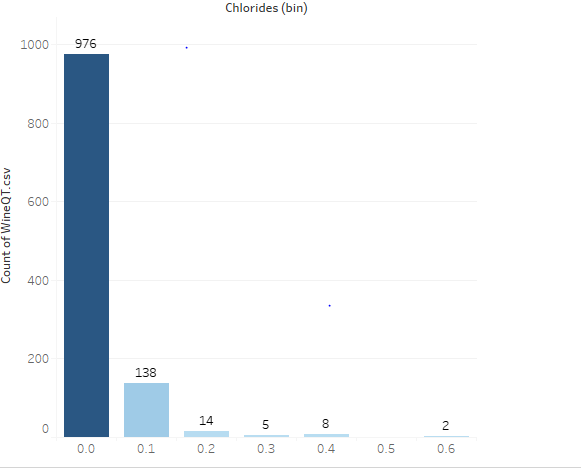

In [102]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

C:\Anaconda\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\Anaconda\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


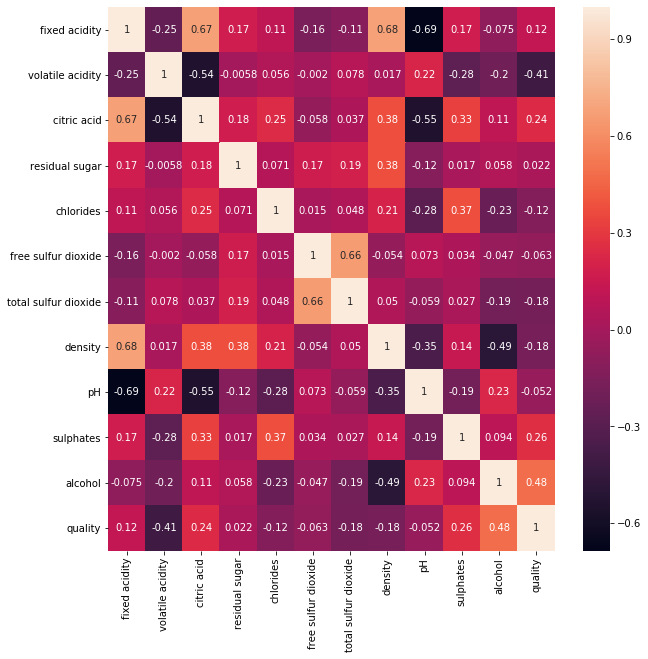

In [103]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [104]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [105]:
data.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [106]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [107]:
x=data.drop(['quality','fixed acidity','density','citric acid'],axis=1)

In [108]:
y=data['quality']

# Model building- Random Forest Classifier

In [109]:
from sklearn.model_selection import train_test_split

In [120]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=45)

In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [122]:
ypred=rfc.predict(xtest)

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.7205240174672489

In [124]:
from sklearn import metrics

In [125]:
metrics.f1_score(ytest,ypred,average='weighted')

0.7028616832140806

In [126]:
from sklearn.metrics import mean_squared_error

In [127]:
mean_squared_error(ytest,ypred)

0.38427947598253276

In [128]:
xtrain.head()

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
724,0.58,1.8,0.088,12.0,18.0,3.32,0.56,10.5
794,0.47,1.4,0.055,27.0,33.0,3.45,0.48,12.3
195,0.54,3.0,0.077,7.0,27.0,3.69,0.91,9.4
744,0.53,2.4,0.093,30.0,52.0,3.19,0.76,11.6
639,0.59,6.0,0.060,11.0,18.0,3.41,0.59,10.8


# predicting with new values

In [129]:
new=[[0.45,2.9,0.0059,43.0,35.0,3.79,0.45,6.7],[0.4,3,0.1056,15.0,55.0,3.99,0.56,4.7]]
real=rfc.predict(new)
real

array([5, 5], dtype=int64)